In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np
from collections import Counter 
import calendar

In [2]:
def startsWithDate(s):
    if re.search('([0-2][0-9]|(3)[0-1])(.)(((0)[0-9])|((1)[0-2]))(.)(\d{4})',s):
        return True
    else:
        return False

In [3]:
def getDataPoint(line):
    datetime = line[line.find("[")+1:line.find("]")]
    author = re.search('(.*)] (.*):',line).group(2)
    author = author.split(":")[0]
    msg = line.split(':', 3)[3][1:]
    return datetime, author, msg

In [ ]:
conversationPath = 'C:/Users/Sezin/Desktop/chat.txt' 

In [5]:
parsedData = [] 

with open(conversationPath, encoding="utf-8") as fp:
    fp.readline() 
    messageBuffer = [] 
    date, time, author = None, None, None 
    while True:
        line = fp.readline() 
        if not line:
            break
        line = line.strip() 
        try:
            if startsWithDate(line): 
                if len(messageBuffer) > 0: 
                    parsedData.append([datetime, author, ' '.join(messageBuffer)]) 
                messageBuffer.clear() 
                datetime, author, message = getDataPoint(line)
                messageBuffer.append(message) 
            else:
                messageBuffer.append(line) 
        except AttributeError:
            continue

In [7]:
df = pd.DataFrame(parsedData, columns=['Datetime', 'Author', 'Message'])

In [ ]:
author_value_counts = df['Author'].value_counts() 
top_10_author_value_counts = author_value_counts.head(10) 
top_10_author_value_counts.plot.barh()

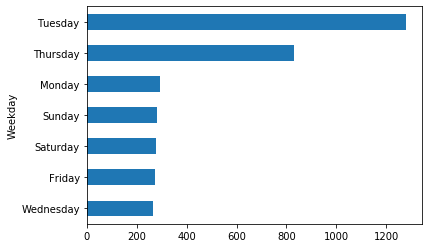

In [9]:
df.Datetime = pd.to_datetime(df.Datetime)
df["Weekday"] = df.Datetime.apply(lambda x: calendar.day_name[x.weekday()])
weekday=df.groupby("Weekday").count().sort_values("Datetime")
weekday.Datetime.plot.barh()

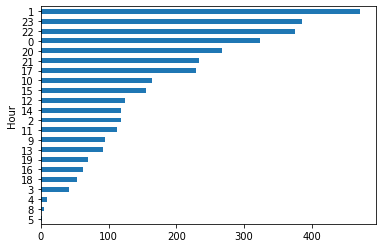

In [10]:
df["Hour"] = df.Datetime.apply(lambda x: x.hour)
hour=df.groupby("Hour").count().sort_values("Datetime")
hour.Datetime.plot.barh()

In [ ]:
def select_person_most_common_words(person, red_words, word_number):
    temp = list(df[df.Author==person].Message)
    k=[i.split() for i in temp]
    temp_2=[inner for outer in k for inner in outer]
    temp_3=pd.DataFrame.from_dict((dict(Counter(i for i in temp_2))),orient='index')
    f=temp_3.reset_index()
    f=f.rename(columns={"index":"word",0:"count"})
    f=f.loc[~f.word.isin(b)]
    f=f.sort_values("count",ascending=False).head(word_number)

In [35]:
redundant_words = ["görüntü","dahil","edilmedi","Deniz","Sezin:","ses","görüntü "," görüntü"," ses","de","bi","da","ya","Ben","görüntü","mı","mi","\u200egörüntü"]

In [37]:
select_person_most_common_words("Sezin", redundant_words, 20)

,word,count
58,bir,84
110,var,46
64,😂,44
22,ben,44
4,bu,43
139,biraz,36
231,Bir,31
106,şimdi,30
179,Sen,26
143,o,26
